In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [30]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [31]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [32]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

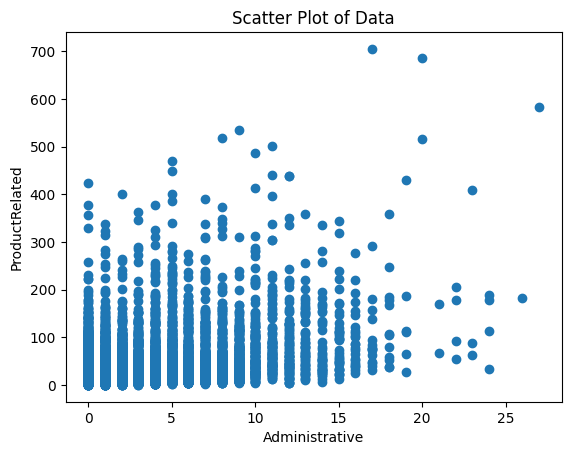

In [33]:
plt.scatter(x=df['Administrative'], y=df['ProductRelated'])
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title('Scatter Plot of Data')
plt.show()

In [34]:
columns_for_clustering = ['Administrative', 'ProductRelated']

# Elbow method to find the optimum number of clusters


In [35]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(df[columns_for_clustering])
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

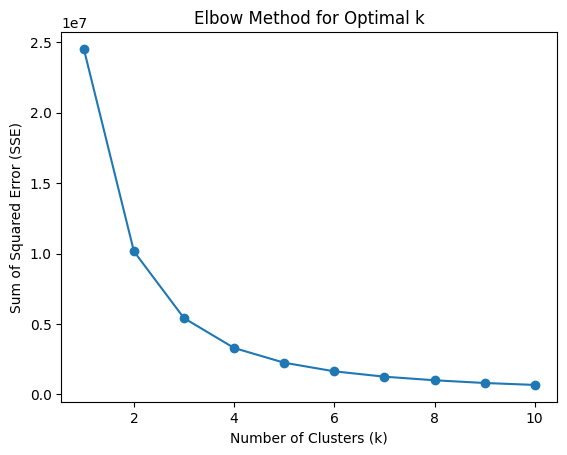

In [36]:
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()


Based on the graph, the optimal number of clusters is 8. This is the point where the line starts to flatten out

In [37]:
optimal_k = int(input("Enter the optimal number of clusters: "))

Enter the optimal number of clusters: 8


# K-means Clustering

In [38]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=2)
kmeans_optimal.fit(df[columns_for_clustering])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=2)

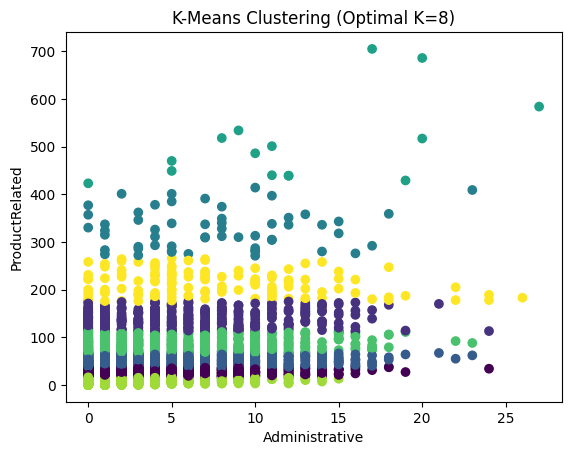

In [39]:
df['KMeans_Optimal'] = kmeans_optimal.labels_

plt.scatter(x=df['Administrative'], y=df['ProductRelated'], c=df['KMeans_Optimal'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'K-Means Clustering (Optimal K={optimal_k})')
plt.show()

# Silhouette score
The silhouette score is a metric used to evaluate the quality of clusters formed by a clustering algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation)

In [40]:
silhouette_avg_kmeans = silhouette_score(df[columns_for_clustering], kmeans_optimal.labels_)
print(f'Silhouette Score for K-Means Clustering: {silhouette_avg_kmeans}')

Silhouette Score for K-Means Clustering: 0.5462969897552381


# Hierarchical Clustering

In [41]:
data_scaled_hierarchical = StandardScaler().fit_transform(df[columns_for_clustering])
linkage_matrix = linkage(data_scaled_hierarchical, method='ward')


# dendrogram plotting

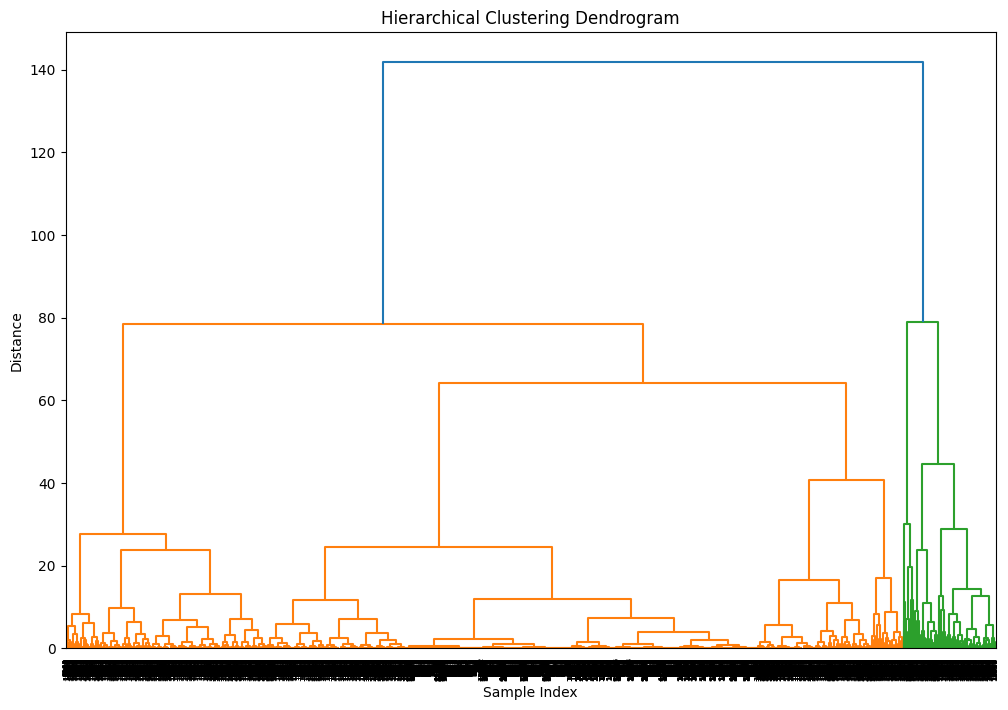

In [42]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [43]:
optimal_clusters_hierarchical = int(input("Enter the optimal number of clusters for Hierarchical clustering: "))

Enter the optimal number of clusters for Hierarchical clustering: 3


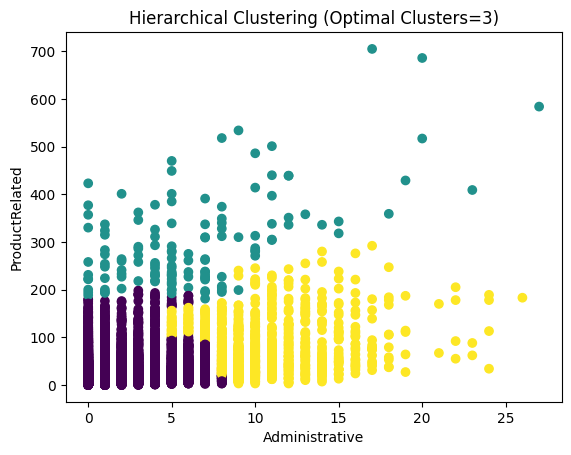

In [49]:
hierarchical_clusters = fcluster(linkage_matrix, optimal_clusters_hierarchical, criterion='maxclust')
df['Hierarchical_Clusters'] = hierarchical_clusters

plt.scatter(x=df['Administrative'], y=df['ProductRelated'], c=df['Hierarchical_Clusters'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'Hierarchical Clustering (Optimal Clusters={optimal_clusters_hierarchical})')
plt.show()

# Silhouette score
pairwise_distances represents the pairwise distances between data points in your dataset. The silhouette score is then calculated based on the cluster assignments obtained from hierarchical clustering.

In [48]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

pairwise_distances = pdist(StandardScaler().fit_transform(df[columns_for_clustering]))
pairwise_distances_square = squareform(pairwise_distances)

if np.isnan(pairwise_distances_square).any():
    raise ValueError("Pairwise distances contain missing values. Handle or remove missing values before proceeding.")

if len(hierarchical_clusters) != len(pairwise_distances_square):
    raise ValueError("Inconsistent numbers of samples between hierarchical_clusters and pairwise_distances_square.")

silhouette_avg_hierarchical = silhouette_score(pairwise_distances_square, hierarchical_clusters)

print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.6537565997024019
